<a href="https://colab.research.google.com/github/kdw9687/Capstone/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
data=pd.read_csv("/Users/kimdongwook/Desktop/캡스톤 디자인/데이터 판다스용완 복사본.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
import platform
rc('font', family='AppleGothic')

In [ ]:
data.dropna(inplace=True)


In [ ]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)

In [ ]:
data.set_index('영화명',inplace=True)

In [ ]:
corr=data.corr()
corr['전국 관객수']

주연 top50 출연 여부                                                   0.308597
배급사                                                              0.210274
수상내역                                                             0.405094
국적                                                               0.147828
전국 스크린수                                                          0.618742
전국 매출액                                                           0.995747
전국 관객수                                                           1.000000
경쟁작                                                             -0.000585
가족                                                              -0.048411
공연                                                              -0.021245
공포(호러)                                                          -0.072037
기타                                                              -0.030380
다큐멘터리                                                           -0.008026
드라마                                   

In [ ]:
target=data['전국 관객수']
target.dropna(inplace=True)

In [ ]:
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target
y=pd.DataFrame(y)
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=5)


In [ ]:
trainY=trainY.values.ravel()
k=trainY
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=1
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=2
    elif k[i]>=3000000 and k[i]<5000000:
        k[i]=3
    elif k[i]>=5000000 and k[i]<7000000:
        k[i]=4
    else:
        k[i]=5
testY=testY.values.ravel()
k=testY
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=1
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=2
    elif k[i]>=3000000 and k[i]<5000000:
        k[i]=3
    elif k[i]>=5000000 and k[i]<7000000:
        k[i]=4
    else:
        k[i]=5

<ipython-input-9-e91dafb2a383>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm_notebook(range(1, 20)):


depth = 1 done.
depth = 2 done.
depth = 3 done.
depth = 4 done.
depth = 5 done.
depth = 6 done.
depth = 7 done.
depth = 8 done.
depth = 9 done.
depth = 10 done.
depth = 11 done.
depth = 12 done.
depth = 13 done.
depth = 14 done.
depth = 15 done.
depth = 16 done.
depth = 17 done.
depth = 18 done.
depth = 19 done.



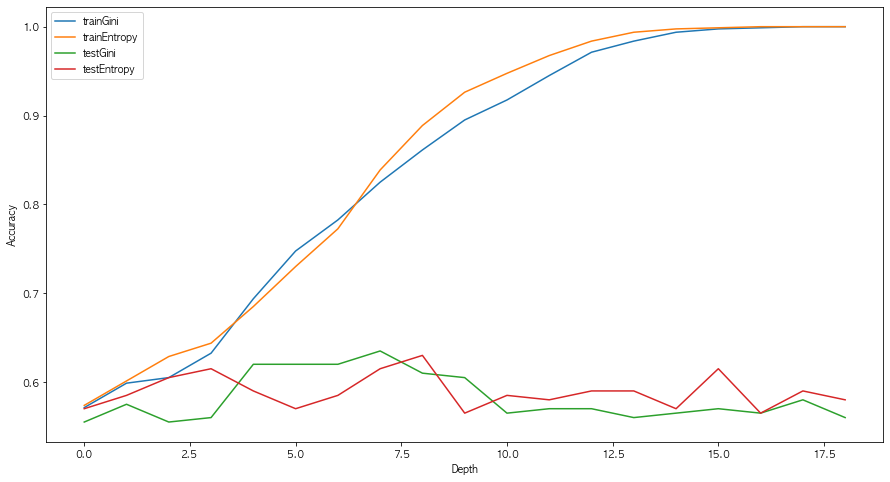

시험 데이터의 정확도 = 0.6150
최적 트리의 depth = 8


In [ ]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

# 사전 가지치기
for k in tqdm_notebook(range(1, 20)):
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(trainX, trainY)
    
    trainGini.append(dt.score(trainX, trainY))
    testGini.append(dt.score(testX, testY))
    
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    dt.fit(trainX, trainY)
    
    trainEntropy.append(dt.score(trainX, trainY))
    testEntropy.append(dt.score(testX, testY))
    
    depth.append(k)
    print('depth = %d done.' % k)

plt.figure(figsize=(15, 8))
plt.plot(trainGini, label='trainGini')
plt.plot(trainEntropy, label='trainEntropy')
plt.plot(testGini, label='testGini')
plt.plot(testEntropy, label='testEntropy')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Accuracy')

plt.show()

# 정확도가 가장 큰 최적의 depth를 찾는다
nDepth = depth[np.argmax(testGini)]

# opt_alpha를 적용한 tree를 사용한다.
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(trainX, trainY)
print('시험 데이터의 정확도 = %.4f' % dt.score(testX, testY))
print('최적 트리의 depth = %d' % nDepth)


In [ ]:
np.argmax(testGini)

7

마지막 tree의 노드 개수  = 3
마지막 tree의 alpha  = 0.0876
마지막 tree의 depth  = 1


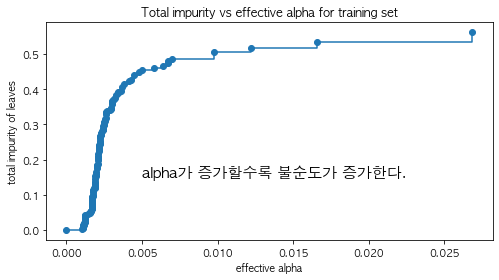

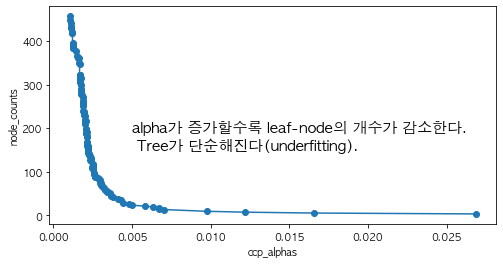

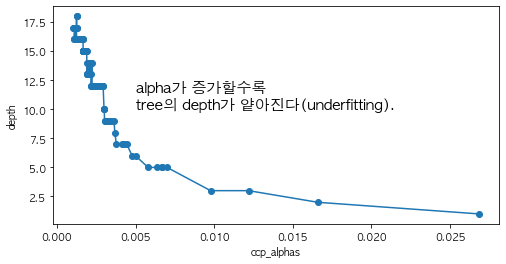

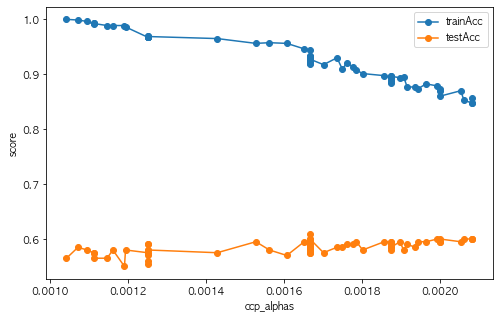

시험 데이터의 정확도 = 0.5800
Optimal alpha = 0.00166667


In [ ]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(trainX, trainY)
# alpha값과 error값을 리턴해줌
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('effective alpha')
plt.ylabel('total impurity of leaves')
plt.text(0.005, 0.15, 'alpha가 증가할수록 불순도가 증가한다.', fontsize=15)
plt.title('Total impurity vs effective alpha for training set')

# ccp_alphas가 너무 작은 것은 제외한다
ccp_alphas = ccp_alphas[np.where(ccp_alphas>0.0001)]

clfs = []
for i, ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(trainX, trainY)
    clfs.append(clf)
    
#     print('%d) ccp_alphas = %.4f done.' % (i, ccp_alpha))

print('마지막 tree의 노드 개수  = %d' % clfs[-1].tree_.node_count)
print('마지막 tree의 alpha  = %.4f' % ccp_alphas[-1])
print('마지막 tree의 depth  = %d' % clfs[-1].tree_.max_depth)

# 마지막 tree는 depth = 0이므로 제외한다.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# ccp_alphas가 증가할수록 node개수와 depth가 감소하는 것을 확인한다.
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas, node_counts, marker='o')
plt.xlabel('ccp_alphas')
plt.ylabel('node_counts')
plt.text(0.005, 150, 'alpha가 증가할수록 leaf-node의 개수가 감소한다.\n Tree가 단순해진다(underfitting).', fontsize=15)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(ccp_alphas, depth, marker='o')
plt.xlabel('ccp_alphas')
plt.ylabel('depth')
plt.text(0.005, 10, 'alpha가 증가할수록 \ntree의 depth가 얕아진다(underfitting).', fontsize=15)
plt.show()

# ccp_alphas를 적용한 tree들 (clfs)로 score를 계산한다.
# clfs는 앞 부분 n개만 사용한다. 뒷 부분은 alpha가 너무 크기 때문에 제외한다.
n=70
train_scores = [clf.score(trainX, trainY) for clf in clfs[:n]]
test_scores = [clf.score(testX, testY) for clf in clfs[:n]]

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas[:n], train_scores[:n], marker='o', label='trainAcc')
plt.plot(ccp_alphas[:n], test_scores[:n], marker='o', label='testAcc')
plt.xlabel('ccp_alphas')
plt.ylabel('score')
plt.legend()
plt.show()

# test_scores[:n]중 가장 큰 최적 alpha를 찾는다.
opt_alpha = ccp_alphas[np.argmax(test_scores[:n])]

# opt_alpha를 적용한 tree를 사용한다.
dt = DecisionTreeClassifier(ccp_alpha=opt_alpha)
dt.fit(trainX, trainY)

print('시험 데이터의 정확도 = %.4f' % dt.score(testX, testY))
print('Optimal alpha = %.8f' % opt_alpha)

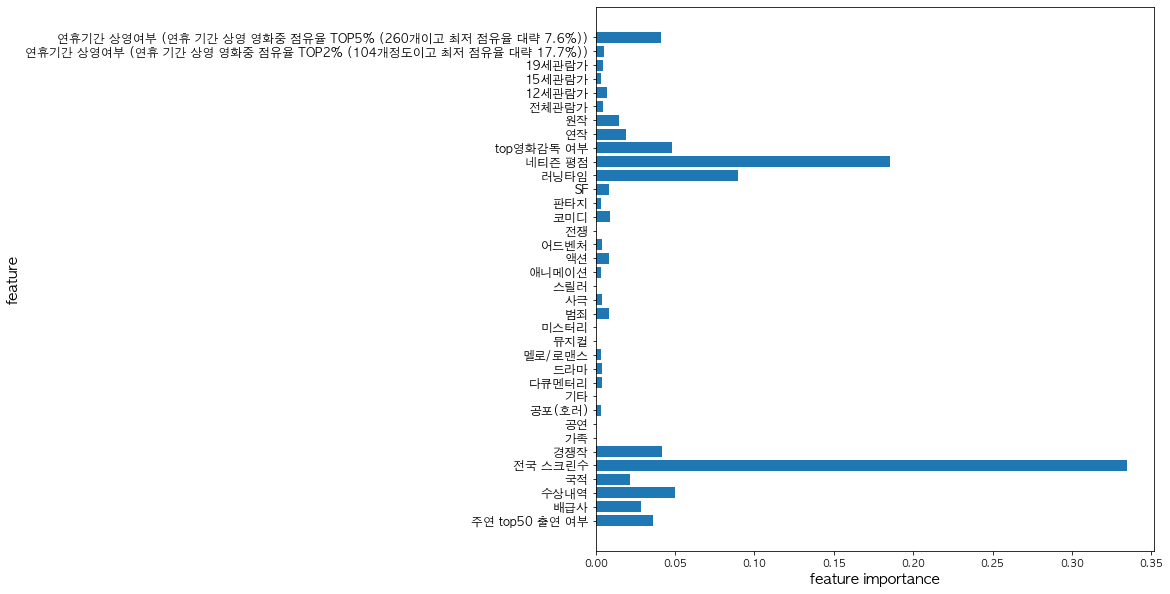

In [ ]:
feature_importance = dt.feature_importances_
feature_name = list(x.columns)
n_feature = trainX.shape[1]
idx = np.arange(n_feature)
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()